# TP5 : Sound Rendering 
by BOUJNOUNI Fatine 

In [1]:
#Imports 
import numpy as np
import scipy.io as sio
from scipy.io import wavfile
import matplotlib.pyplot as plt

from IPython import display as idp

## 1 - First Part 

In this first part, I tested the MATLAB programs $show_data$ and $hor_show_data$ that allow to listen to some binaural rendering exemples. 
I notice that when the azimuth is high (80), we can hear the sound from the right ear, and when it's low (-80), we can hear it from the left ear. When we play the cone of confusion, the sound goes from down to up and then return to down. 
Also the elevation value affect from where we can hear the sound. 

## 2 - Second Part 
### 2-1 : Binaural Filtering 

In [2]:
def getNearestUCDpulse(azimuth,elevation,h3D): 
    elmax = 50
    elindices = np.array(range(1, elmax+1))
    elevations = -45 + 5.625*(elindices-1)
    azimuths =  np.array([-80, -65, -55] + list(range(-45,46,5)) + [55, 65, 80])
    
    el = round((elevation+45)/5.625 +1)
    el= max(el,1)
    el = min(el,elmax)
    elerr= el - (elevation+45)/5.625 +1
    
    azerr = np.min(abs(azimuths - azimuth))
    azim = np.argmin(abs(azimuths - azimuth))   
    
    print('les paramètres utilisés pour la HRTF sont:\n \t azimuth:',azimuths[azim] , ' degrés \n \t élevation: ',-45 + 5.625*(el-1) ,' degrés')
    print('\nles indices sont:\n \t azim: ',azim,' \n \t el: ', el)
    
    pulse = h3D[azim, el, :]
    
    return pulse, azerr, elerr

In [9]:
def Binaural_signals(s, azimuth, elevation, left_filter, right_filter):
    pulse_l, azerr, elerr = getNearestUCDpulse(azimuth, elevation, left_filter)
    pulse_r, azerr, elerr = getNearestUCDpulse(azimuth, elevation, right_filter)
    left_signal = np.convolve(s, pulse_l).reshape(1, -1)
    right_signal = np.convolve(s, pulse_r).reshape(1, -1)

    return np.concatenate((left_signal, right_signal), axis=0)


In [10]:
subjects = ["subject_003/hrir_final.mat", "subject_065/hrir_final.mat"]
sound_files = ['Sons/Glass_break_44.wav', 'Sons/drum_roll44.wav', 'Sons/snare1_44.wav', 'Sons/Cello_pizz.wav', 'Sons/Cello_arco.wav', 'Sons/C3.wav', 'Sons/C4.wav']
HRIR_dataset = sio.loadmat(subjects[0])
left_f = HRIR_dataset["hrir_l"]
right_f = HRIR_dataset["hrir_r"]

#### Binaural filtering for a fixed position in space

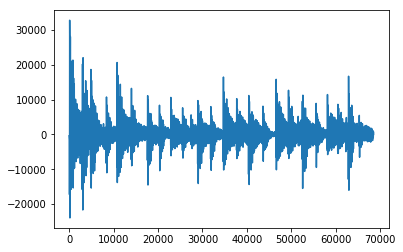

In [11]:
s = sound_files[1]
rate, frames = wavfile.read(s)

plt.plot(frames)
idp.Audio(frames, rate=rate)

In [12]:
elevations = -45 + 5.625*(np.array(range(1, 50+1))-1)
azimuths =  np.array([-80, -65, -55] + list(range(-45,46,5)) + [55, 65, 80])
print("Elevations : ", elevations)
print("Azimuths : ", azimuths)

Elevations :  [-45.    -39.375 -33.75  -28.125 -22.5   -16.875 -11.25   -5.625   0.
   5.625  11.25   16.875  22.5    28.125  33.75   39.375  45.     50.625
  56.25   61.875  67.5    73.125  78.75   84.375  90.     95.625 101.25
 106.875 112.5   118.125 123.75  129.375 135.    140.625 146.25  151.875
 157.5   163.125 168.75  174.375 180.    185.625 191.25  196.875 202.5
 208.125 213.75  219.375 225.    230.625]
Azimuths :  [-80 -65 -55 -45 -40 -35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25
  30  35  40  45  55  65  80]


In [13]:
#left_s, right_s 
s1 = Binaural_signals(frames,90, 0,left_f, right_f )
idp.Audio(s1, rate=rate)


les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  24  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  24  
 	 el:  9


This sound is heard on the right

In [14]:
s2 = Binaural_signals(frames,-90, 90,left_f, right_f )
idp.Audio(s2, rate=rate)

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  0  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  0  
 	 el:  25


This one is heard from the left. 

> We have 25 different azimuth values from -90° to 90° degrees, and 64 elevation values from -45° to 230°. Those two parameters define a position in space. Our binaural filter manage to simulate a sound on a fixed position defined by an azimuth and an elevation. I tested the function on all the sound files provided and it works very well. 

#### Binaural filtering for a trajectory

In [15]:
rate1, frames1 = wavfile.read(sound_files[2])
s3 = []
s = 0
for el in range(-45,231): 
    if s%2==0:
        for az in azimuths:
            S = Binaural_signals(frames1, az, el, left_f, right_f )
            s3.append(S)
            s += 1
    else: 
        for az in reversed(azimuths):
            S = Binaural_signals(frames1, az, el, left_f, right_f )
            s3.append(S)
            s += 1


les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  -45.0  degrés

les indices sont:
 	 azim:  0  
 	 el:  1
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  -45.0  degrés

les indices sont:
 	 azim:  0  
 	 el:  1
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  -45.0  degrés

les indices sont:
 	 azim:  1  
 	 el:  1
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  -45.0  degrés

les indices sont:
 	 azim:  1  
 	 el:  1
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  -45.0  degrés

les indices sont:
 	 azim:  2  
 	 el:  1
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  -45.0  degrés

les indices sont:
 	 azim:  2  
 	 el:  1
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  -45.0  degrés

les indices sont:
 	 azim:  3  
 	 el:  1
les paramètres utili

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  15  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  15  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  14  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  14  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  13  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  13  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  12  
 	 el:  2
les param

 	 azimuth: -40  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  4  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  4  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  5  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  5  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  6  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  6  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  7  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azi

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  -39.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  2
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  24  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  24  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  23  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  23  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  22  
 	 el:  3
les paramèt

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  16  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  16  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  15  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  15  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  14  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  14  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  13  
 	 el:  3
les paramètres

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  4  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  4  
 	 el:  3
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  -33.75  degrés

les indices sont:
 	 azim:  3  
 	 el:  3
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  13  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  13  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  14  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  14  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  15  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  15  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  16  
 	 el:  4
les para

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  24  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  24  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  23  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  23  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  22  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  22  
 	 el:  4
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  -28.125  degrés

les indices sont:
 	 azim:  21  
 	 el:  4
les pa

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  4  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  4  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  3  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  3  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  2  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  2  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  1  
 	 el:  5
les paramètres utili

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  17  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  17  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  18  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  18  
 	 el:  5
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  -22.5  degrés

les indices sont:
 	 azim:  19  
 	 el:  5
les paramètres utili

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  12  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  12  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  11  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  11  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  10  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  10  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  9  
 	 el:  6
les pa

 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  10  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  9  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  9  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  8  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  8  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  7  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  -16.875  degrés

les indices sont:
 	 azim:  7  
 	 el:  6
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 él

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  5  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  5  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  6  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  6  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  7  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  7  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  8  
 	 el:  7
les paramètre

 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  21  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 40  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  20  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 40  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  20  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  19  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  19  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  18  
 	 el:  7
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  -11.25  degrés

les indices sont:
 	 azim:  18  
 	 el:  7
les

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  11  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  11  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  12  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  12  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  13  
 	 el:  8
les paramètres

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  7  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  7  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  8  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  8  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  9  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  9  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  8
les paramètr

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  14  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  14  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  15  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  15  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  16  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  16  
 	 el:  8
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  -5.625  degrés

les indices sont:
 	 azim:  17  
 	 el:  8
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  9  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  9  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  8  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  8  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  7  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  7  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  6  
 	 el:  9
les paramètres utilisés pour la HR

 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  11  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  12  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  12  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  13  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  13  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  14  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  14  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  5.

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  16  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  16  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  15  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  15  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  14  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  14  
 	 el:  10
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  5.625  degrés

les indices sont:
 	 azim:  13  
 	 el:  10
les paramètres

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  0  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  1  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  1  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  2  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  2  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  3  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  3  
 	 el:  11
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  14  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  14  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  15  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  15  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  16  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  16  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  17  
 	 el:  11
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  19  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  19  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  18  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  18  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  17  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  17  
 	 el:  11
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  11.25  degrés

les indices sont:
 	 azim:  16  
 	 el:  11
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  2  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  2  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  1  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  1  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  0  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  0  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  0  
 	 el:  12
les pa

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  11  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  11  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  12  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  12  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  13  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  13  
 	 el:  12
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  16.875  degrés

les indices sont:
 	 azim:  14  
 	 el:  12
les paramè

 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  15  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  15  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  14  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  14  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  13  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  13  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  22.5  de

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  10  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  10  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  11  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  11  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  12  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  12  
 	 el:  13
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  22.5  degrés

les indices sont:
 	 azim:  13  
 	 el:  13
les paramètres utilis

 	 azimuth: 55  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  22  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  23  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  23  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  24  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  24  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  24  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  24  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azi

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  3  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  3  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  2  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  2  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  1  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  1  
 	 el:  14
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  28.125  degrés

les indices sont:
 	 azim:  0  
 	 el:  14
les pa

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  18  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  18  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  19  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  19  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 40  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  20  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 40  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  20  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  21  
 	 el:  15
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  15
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  33.75  degrés

les indices sont:
 	 azim:  4  
 	 el:  15
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  16
les pa

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  9  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  9  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  8  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  8  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  7  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  7  
 	 el:  16
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  39.375  degrés

les indices sont:
 	 azim:  6  
 	 el:  16
les pa

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  45.0  degrés

les indices sont:
 	 azim:  15  
 	 el:  17
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  45.0  degrés

les indices sont:
 	 azim:  15  
 	 el:  17
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  45.0  degrés

les indices sont:
 	 azim:  16  
 	 el:  17
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  45.0  degrés

les indices sont:
 	 azim:  16  
 	 el:  17
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  45.0  degrés

les indices sont:
 	 azim:  17  
 	 el:  17
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  45.0  degrés

les indices sont:
 	 azim:  17  
 	 el:  17
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  45.0  degrés

les indices sont:
 	 azim:  18  
 	 el:  17
les paramètres utili

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  9  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  9  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  8  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  8  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  7  
 	 el:  18
les 

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  23  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  23  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  24  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  24  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  24  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  24  
 	 el:  18
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  50.625  degrés

les indices sont:
 	 azim:  23  
 	 el:  18
les pa

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  3  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  3  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  4  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  4  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  5  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  5  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  6  
 	 el:  19
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  24  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  24  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  23  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  23  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  22  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  22  
 	 el:  19
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  56.25  degrés

les indices sont:
 	 azim:  21  
 	 el:  19
les paramètre

 	 azimuth: -35  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  5  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  6  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  6  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  7  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  7  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  8  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  8  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azi

 	 azim:  11  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  10  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  10  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  9  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  9  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  8  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 azim:  8  
 	 el:  20
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  61.875  degrés

les indices sont:
 	 

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  15  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  15  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  17  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  17  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  18  
 	 el:  21
les paramètres utili

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  8  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  8  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  7  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  7  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  6  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  6  
 	 el:  21
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  67.5  degrés

les indices sont:
 	 azim:  5  
 	 el:  21
les paramètres utili

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  73.125  degrés

les indices sont:
 	 azim:  13  
 	 el:  22
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  73.125  degrés

les indices sont:
 	 azim:  13  
 	 el:  22
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  73.125  degrés

les indices sont:
 	 azim:  14  
 	 el:  22
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  73.125  degrés

les indices sont:
 	 azim:  14  
 	 el:  22
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  73.125  degrés

les indices sont:
 	 azim:  15  
 	 el:  22
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  73.125  degrés

les indices sont:
 	 azim:  15  
 	 el:  22
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  73.125  degrés

les indices sont:
 	 azim:  16  
 	 el:  22
les para

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  12  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  12  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  11  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  11  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  10  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  10  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  9  
 	 el:  23
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  10  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  10  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  9  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  9  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  8  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  8  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  23
les paramèt

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  16  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  16  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  17  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  17  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  18  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  18  
 	 el:  23
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  78.75  degrés

les indices sont:
 	 azim:  19  
 	 el:  23
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  84.375  degrés

les indices sont:
 	 azim:  4  
 	 el:  24
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  84.375  degrés

les indices sont:
 	 azim:  4  
 	 el:  24
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  84.375  degrés

les indices sont:
 	 azim:  3  
 	 el:  24
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  84.375  degrés

les indices sont:
 	 azim:  3  
 	 el:  24
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  84.375  degrés

les indices sont:
 	 azim:  2  
 	 el:  24
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  84.375  degrés

les indices sont:
 	 azim:  2  
 	 el:  24
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  84.375  degrés

les indices sont:
 	 azim:  1  
 	 el:  24
les pa

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  24  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  24  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  23  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  23  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  22  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  22  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  21  
 	 el:  25
les paramètres utili

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  7  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  7  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  8  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  8  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  9  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  9  
 	 el:  25
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  90.0  degrés

les indices sont:
 	 azim:  10  
 	 el:  25
les paramètres util

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  9  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  9  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  8  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  8  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  7  
 	 el:  26
les 

 	 azim:  21  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  22  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  22  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  23  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  23  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  24  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azim:  24  
 	 el:  26
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  95.625  degrés

les indices sont:
 	 azi

 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  5  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  5  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  6  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  6  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  7  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  7  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  8  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 éle

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  11  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  10  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  10  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  9  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  9  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  8  
 	 el:  27
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  101.25  degrés

les indices sont:
 	 azim:  8  
 	 el:  27
les 

 	 azim:  21  
 	 el:  28
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  106.875  degrés

les indices sont:
 	 azim:  22  
 	 el:  28
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  106.875  degrés

les indices sont:
 	 azim:  22  
 	 el:  28
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  106.875  degrés

les indices sont:
 	 azim:  23  
 	 el:  28
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  106.875  degrés

les indices sont:
 	 azim:  23  
 	 el:  28
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  106.875  degrés

les indices sont:
 	 azim:  24  
 	 el:  28
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  106.875  degrés

les indices sont:
 	 azim:  24  
 	 el:  28
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  106.875  degrés

les indices sont:

 	 azimuth: -35  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  5  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  5  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  6  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  6  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  7  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  7  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  8  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -

 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  11  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  10  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  10  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  9  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  9  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  8  
 	 el:  29
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  112.5  degrés

les indices sont:
 	 azim:  8  
 	 el:  29


 	 élevation:  118.125  degrés

les indices sont:
 	 azim:  21  
 	 el:  30
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  118.125  degrés

les indices sont:
 	 azim:  22  
 	 el:  30
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  118.125  degrés

les indices sont:
 	 azim:  22  
 	 el:  30
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  118.125  degrés

les indices sont:
 	 azim:  23  
 	 el:  30
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  118.125  degrés

les indices sont:
 	 azim:  23  
 	 el:  30
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  118.125  degrés

les indices sont:
 	 azim:  24  
 	 el:  30
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  118.125  degrés

les indices sont:
 	 azim:  24  
 	 el:  30
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 

 	 azimuth: -35  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  8  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azi

 	 azim:  11  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  11  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  10  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  10  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  9  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  9  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 azim:  8  
 	 el:  31
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  123.75  degrés

les indices sont:
 	 

 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  21  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  22  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  22  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 

 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  5  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  5  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  6  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  6  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  7  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  7  
 	 el:  32
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  129.375  degrés

les indices sont:
 	 azim:  8  

 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  11  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  11  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  10  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  10  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  9  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  9  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  8  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevati

 	 azimuth: 45  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  21  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  22  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  22  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  23  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  23  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  24  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  135.0  degrés

les indices sont:
 	 azim:  24  
 	 el:  33
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 8

 	 azim:  4  
 	 el:  34
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  140.625  degrés

les indices sont:
 	 azim:  5  
 	 el:  34
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  140.625  degrés

les indices sont:
 	 azim:  5  
 	 el:  34
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  140.625  degrés

les indices sont:
 	 azim:  6  
 	 el:  34
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  140.625  degrés

les indices sont:
 	 azim:  6  
 	 el:  34
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  140.625  degrés

les indices sont:
 	 azim:  7  
 	 el:  34
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  140.625  degrés

les indices sont:
 	 azim:  7  
 	 el:  34
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  140.625  degrés

les indices sont:

 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  11  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  11  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  10  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  10  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  9  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  9  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  8  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 

 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  21  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  22  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  22  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  23  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  23  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  24  
 	 el:  35
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  146.25  degrés

les indices sont:
 	 azim:  24  
 	 el:


les indices sont:
 	 azim:  4  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  5  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  5  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  6  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  6  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  7  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  7  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  151.875  degrés

 	 azimuth: -5  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  11  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  11  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  10  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  10  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  9  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  9  
 	 el:  36
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  151.875  degrés

les indices sont:
 	 azim:  8  
 	 el:  36
les paramètres utilisés pour la HRTF son

 	 azim:  21  
 	 el:  37
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  157.5  degrés

les indices sont:
 	 azim:  21  
 	 el:  37
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  157.5  degrés

les indices sont:
 	 azim:  22  
 	 el:  37
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  157.5  degrés

les indices sont:
 	 azim:  22  
 	 el:  37
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  157.5  degrés

les indices sont:
 	 azim:  23  
 	 el:  37
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  157.5  degrés

les indices sont:
 	 azim:  23  
 	 el:  37
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  157.5  degrés

les indices sont:
 	 azim:  24  
 	 el:  37
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  157.5  degrés

les indices sont:
 	 azim:  24 

 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  4  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  5  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  5  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  6  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  6  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  7  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  7  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  11  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  11  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  10  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  10  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  9  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  9  
 	 el:  38
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  163.125  degrés

les indices sont:
 	 azim:  8  
 	 el:  

 	 azim:  21  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  21  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  22  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  22  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  23  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  23  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  24  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azi

 	 azimuth: -40  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  4  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  168.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  39
les paramètres utilisés pour la HRTF sont:
 	 azi

 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  11  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  11  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  10  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  10  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  9  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  9  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  8

 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  21  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  21  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  22  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  22  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  174.375  degrés

les indices sont:
 	 azim:  24  
 	 el:  40
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 

 	 azimuth: -40  degrés 
 	 élevation:  180.0  degrés

les indices sont:
 	 azim:  4  
 	 el:  41
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  180.0  degrés

les indices sont:
 	 azim:  5  
 	 el:  41
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  180.0  degrés

les indices sont:
 	 azim:  5  
 	 el:  41
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  180.0  degrés

les indices sont:
 	 azim:  6  
 	 el:  41
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  180.0  degrés

les indices sont:
 	 azim:  6  
 	 el:  41
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  180.0  degrés

les indices sont:
 	 azim:  7  
 	 el:  41
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  180.0  degrés

les indices sont:
 	 azim:  7  
 	 el:  41
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -

 	 azim:  12  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  11  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  11  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  10  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  9  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  9  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  185.625  degrés

les indices so

 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  21  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  21  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  22  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  22  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  23  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  23  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  185.625  degrés

les indices sont:
 	 azim:  24  
 	 el:  42
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  3  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  3  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  2  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  2  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  1  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  1  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  0  
 	 el:  43
les pa

 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  10  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -10  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  10  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  11  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -5  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  11  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  12  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 0  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  12  
 	 el:  43
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 5  degrés 
 	 élevation:  191.25  degrés

les indices sont:
 	 azim:  13  
 	 el: 

 	 azimuth: 40  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  20  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 40  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  20  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  19  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  19  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  18  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  18  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  17  
 	 el:  44
les paramètres utilisés pour la HRTF sont:

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  0  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  0  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  1  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  1  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  2  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  2  
 	 el:  44
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  196.875  degrés

les indices sont:
 	 azim:  3  
 	 el:  44

 	 azimuth: 25  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  17  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  17  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  15  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  15  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 10  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  14  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 1

 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  15  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  16  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  17  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  17  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  18  
 	 el:  45
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  202.5  degrés

les indices sont:
 	 azim:  18  
 	 el:  45
le

 	 élevation:  208.125  degrés

les indices sont:
 	 azim:  1  
 	 el:  46
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  208.125  degrés

les indices sont:
 	 azim:  0  
 	 el:  46
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  208.125  degrés

les indices sont:
 	 azim:  0  
 	 el:  46
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  208.125  degrés

les indices sont:
 	 azim:  0  
 	 el:  46
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  208.125  degrés

les indices sont:
 	 azim:  0  
 	 el:  46
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  208.125  degrés

les indices sont:
 	 azim:  1  
 	 el:  46
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -65  degrés 
 	 élevation:  208.125  degrés

les indices sont:
 	 azim:  1  
 	 el:  46
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -55  degrés 

 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  4  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  4  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  5  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 éle

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  9  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -15  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  9  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  8  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -20  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  8  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -25  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  7  
 	 el:  47
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  213.75  degrés

les indices sont:
 	 azim:  6  
 	 el:  47
les pa

 	 azim:  20  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  21  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 45  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  21  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  22  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 55  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  22  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 65  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  23  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  219.375  degrés

les indices sont:

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  3  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  3  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  4  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -40  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  4  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  5  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -35  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  5  
 	 el:  48
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -30  degrés 
 	 élevation:  219.375  degrés

les indices sont:
 	 azim:  6  
 	 el:  48

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  19  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 35  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  19  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  18  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  18  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  17  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  17  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  16  
 	 el:  49
les paramètre

les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  15  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 15  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  15  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  16  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 20  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  16  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  17  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 25  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  17  
 	 el:  49
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 30  degrés 
 	 élevation:  225.0  degrés

les indices sont:
 	 azim:  18  
 	 el:  49
les paramètre

IndexError: index 50 is out of bounds for axis 1 with size 50

In [ ]:
s3 = np.concatenate((s3), axis=1)
idp.Audio(s3, rate=rate1)

> I defined a trajectory with all the elevation values and all the azimuth values. We can hear the sound going from left to right as the azimuth values change, and from up to down as the elevation values variates. 
The functions seems to work well.

> To have a sound that moves continuously in space, we can should just vary the elevation values and the azimuth values. We can define a trajectory with for example 4 azimuth values and 4 elevation values, and apply our binaural filter on each position. And we can concatene all the results in a list. That's what I did using all elevation and azimuth values. 

### 2-2 : Transaural filtering

In [31]:
def Transaural_signals( s, left_filter, right_filter):
    H_lr, _, _ = getNearestUCDpulse(90, 0, left_filter)
    H_rr, _, _ = getNearestUCDpulse(90, 0, right_filter)
    H_ll, _, _ = getNearestUCDpulse(-90, 0, left_filter)
    H_rl, _, _ = getNearestUCDpulse(-90, 0, right_filter)
    
    H_lr = H_lr.reshape(-1,1)
    H_ll = H_ll.reshape(-1,1)
    H_rr = H_rr.reshape(-1,1)
    H_rl = H_rl.reshape(-1,1)

    H1 = np.concatenate((H_ll, H_rl), axis = 0)
    H2 = np.concatenate((H_lr, H_rr), axis = 0)
    
    H = np.concatenate((H1, H2), axis = 1)
    G = np.linalg.pinv(H)
    
    return np.dot(G.T,s)

s = Binaural_signals(frames,-45, 0,left_f, right_f )
s5 = Transaural_signals(s, left_f, right_f)

les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  3  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -45  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  3  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  24  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: 80  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  24  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  0  
 	 el:  9
les paramètres utilisés pour la HRTF sont:
 	 azimuth: -80  degrés 
 	 élevation:  0.0  degrés

les indices sont:
 	 azim:  0  
 	 el:  9


In [32]:
idp.Audio(s5[:1,:], rate=rate)